In [1]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



path = 'crypto_data.csv'

crypto = pd.read_csv(path)

crypto.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [2]:
#dropping rows w/ null values
crypto = crypto.dropna()
crypto.head()
#code to check change in row counts 
#len(crypto.index) 
# 744

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [3]:
#dropping non-trading cryptos
crypto = crypto[crypto.IsTrading == True]
crypto.head()
#code to check change in row counts 
#len(crypto.index) 
# 685
# print(crypto['IsTrading'].unique())

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [4]:
#dropping unmined crypto
crypto = crypto[crypto.TotalCoinsMined > 0]
crypto.head()
#code to check change in row counts 
#len(crypto.index) 
# 532


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [5]:
# Save CoinName column for later analysis
Coin_Name=pd.DataFrame(crypto['CoinName']).reset_index(drop=True)


In [6]:
#dropping CoinName, IsTrading, & Unnamed: 0 columns
crypto = crypto.drop(columns = ['CoinName', 'IsTrading', 'Unnamed: 0'])
crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
crypto = pd.get_dummies(crypto, columns =['Algorithm', 'ProofType'])
crypto.head()
#from 4 to 98 columns, woof

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Standarizing dataset
scaler = StandardScaler().fit(crypto)
crypto_scaled = scaler.transform(crypto)


In [9]:
#Number of features
len(crypto.columns)
#98 features

98

In [ ]:
#Reducing Dimensions

In [10]:

#initialize PCA model
pca = PCA(n_components=.99)
#get principal components for crypto data
crypto_pca = pca.fit_transform(crypto_scaled)

#show transformed crypto data as dataframe
crypto_pca_df = pd.DataFrame(data = crypto_pca)

crypto_pca_df.head()

#Number of features
#len(crypto_pca_df.columns)
#86


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,1.255726e-15,-0.677740,0.194423,0.147800,0.283666,-0.632204,-0.114891,0.133916,-0.115938,0.009344
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,1.222771e-15,-0.677741,0.194452,0.147753,0.283593,-0.632066,-0.114763,0.133991,-0.115646,0.009188
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,-3.450151e-14,0.619545,0.421467,0.267518,-0.286185,0.453215,-0.447750,-0.073419,0.179144,-1.419059
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-1.152606e-14,0.238515,0.162774,0.130823,-0.103999,0.457951,-0.089676,-0.317943,0.001320,0.178234
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-7.740960e-14,0.222678,-0.073823,0.358934,0.609940,-0.645370,-0.113545,0.100206,0.044561,0.017486


In [11]:

#initializing tSNE model and reducing dimensions
tsne = TSNE(learning_rate=35)
#Reduce dimensions and checking that dimensions have been reduced to 2
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

c:\Users\bryan\anaconda3\envs\bryanenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(532, 2)

c:\Users\bryan\anaconda3\envs\bryanenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


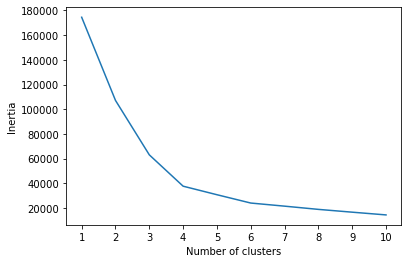

In [12]:

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Clear elbow at k value of 4. 


In [13]:
df_elbow.head(10) 

,k,inertia
0,1,174538.875000
1,2,107213.640625
2,3,63151.808594
3,4,37780.835938
4,5,30874.017578
5,6,24138.300781
6,7,21619.113281
7,8,19005.687500
8,9,16742.033203
9,10,14526.983398


In [14]:
#Predicting Clusters w/ k=4
k_means = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means

,0,1
0,-9.692520,-11.792642
1,-15.003352,-6.458755
2,-12.375457,-20.973736
3,16.233997,-24.870926
4,5.259105,18.405970
...,...,...
527,16.423515,-22.098736
528,-15.785402,-10.103677
529,22.013641,10.007281
530,12.840614,15.549006


In [15]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means)

# Predict clusters
predictions = model.predict(k_means)

# Create return DataFrame with predicted clusters
k_means["class"] = model.labels_
k_means.head()

,0,1,class
0,-9.692520,-11.792642,2
1,-15.003352,-6.458755,2
2,-12.375457,-20.973736,2
3,16.233997,-24.870926,0
4,5.259105,18.405970,3


In [16]:
# Check class value counts
k_means_df['class'].value_counts()

3    200
2    133
0    106
1     93
Name: class, dtype: int64

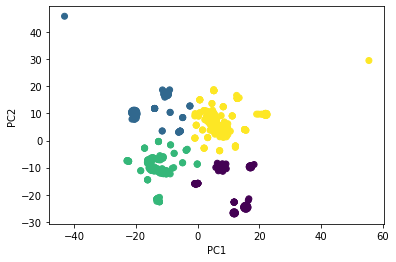

In [17]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [20]:
# Add CoinName to df
final_crypto_df = pd.concat([Coin_Name, k_means_df],axis=1, sort=False)
final_crypto_df  

,CoinName,0,1,class
0,42 Coin,-9.692520,-11.792642,2
1,404Coin,-15.003352,-6.458755,2
2,EliteCoin,-12.375457,-20.973736,2
3,Bitcoin,16.233997,-24.870926,0
4,Ethereum,5.259105,18.405970,3
...,...,...,...,...
527,ZEPHYR,16.423515,-22.098736,0
528,Gapcoin,-15.785402,-10.103677,2
529,Beldex,22.013641,10.007281,3
530,Horizen,12.840614,15.549006,3


In [21]:
# Save cluster dataframes as csv files
for i in range(0,4):
    clusters = final_crypto_df.loc[final_crypto_df['class'] == i]
    clusters.to_csv(f"clusters/crypto_class{i}.csv")

In [ ]:
#Client Recommendation:
# Given these results, it appears that cryptocurrencies can be clustered into 4 distinct groups. I have split the data for each cluster into separate csv files that are attached. 